In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [20]:
dataset = load_digits()
features = dataset.data
labels = dataset.target

In [21]:
X_train, X_valid, y_train, y_valid = train_test_split(
    features, labels, test_size=0.3, random_state=777, stratify=labels
)

pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('classifier', RandomForestClassifier(random_state=42))
])

In [22]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
print("Базовая модель:")
print(f"Accuracy: {accuracy_score(y_valid, y_pred):.4f}")
print(classification_report(y_valid, y_pred))

Базовая модель:
Accuracy: 0.9759
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        54
           1       0.93      1.00      0.96        55
           2       0.98      1.00      0.99        53
           3       1.00      0.93      0.96        55
           4       1.00      0.96      0.98        54
           5       0.98      1.00      0.99        55
           6       1.00      0.98      0.99        54
           7       0.96      1.00      0.98        54
           8       0.94      0.90      0.92        52
           9       1.00      0.98      0.99        54

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540


In [23]:
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
print("\nПерекрестная проверка (кросс-валидация):")
print(f"Средняя точность (accuracy): {np.mean(cv_scores):.4f}")


Перекрестная проверка (кросс-валидация):
Средняя точность (accuracy): 0.9690


In [24]:
param_grid = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

In [25]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [10, 20, None],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [26]:
print("\nЛучшие параметры после решетчатого поиска:")
print(grid_search.best_params_)


Лучшие параметры после решетчатого поиска:
{'classifier__max_depth': 20, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 150}


In [27]:
best_classifier = grid_search.best_estimator_

y_pred_best_model = best_classifier.predict(X_valid)
print("\nУлучшенная модель:")
print(f"Accuracy: {accuracy_score(y_valid, y_pred_best_model):.4f}")
print(classification_report(y_valid, y_pred_best_model))


Улучшенная модель:
Accuracy: 0.9759
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        54
           1       0.93      1.00      0.96        55
           2       0.98      1.00      0.99        53
           3       1.00      0.96      0.98        55
           4       1.00      0.96      0.98        54
           5       0.98      0.98      0.98        55
           6       1.00      0.98      0.99        54
           7       0.96      1.00      0.98        54
           8       0.98      0.88      0.93        52
           9       0.96      0.98      0.97        54

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540


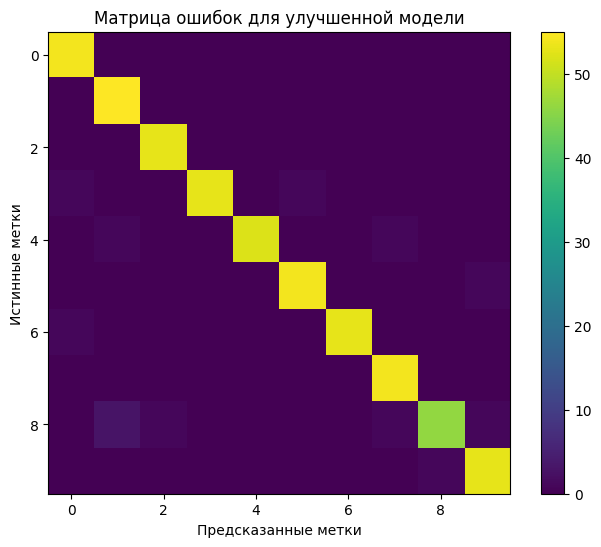

In [28]:
conf_matrix_best_model = confusion_matrix(y_valid, y_pred_best_model)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_best_model, cmap='viridis', interpolation='nearest')
plt.title('Матрица ошибок для улучшенной модели')
plt.colorbar()
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.show()

In [29]:
print("\nСравнение точности:")
print(f"Базовая модель accuracy: {accuracy_score(y_valid, y_pred):.4f}")
print(f"Улучшенная модель accuracy: {accuracy_score(y_valid, y_pred_best_model):.4f}")


Сравнение точности:
Базовая модель accuracy: 0.9759
Улучшенная модель accuracy: 0.9759
